<a href="https://colab.research.google.com/github/oksuzian/Mu2eANL/blob/master/Macros/BackgroundEstimatorML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Init and cuts definition

In [21]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
h5file='drive/MyDrive/root_files_cry4/cry4df.h5'

# This allows you to run on Colaboratory and load files from your Google Drive
try:
    from google.colab import drive
    drive.mount("/content/drive")
    main_path = '/content/drive/MyDrive/'
except:
    main_path = ''
sys.path.append(main_path)
sys.path.append(main_path+'root_files_cry4')
from utils import Utils
util = Utils()
import math

plt.style.use('seaborn-whitegrid')
plt.rcParams["grid.linestyle"] = (5,15)
plt.rcParams["grid.linewidth"] = 0.7
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 22})

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
TMIN = -125
TMAX = 50
PMIN_EXT = 90
PMAX_EXT = 140
PMIN_PHY = 103.85
PMAX_PHY = 105.1


#Default MDC-style cut box
cuts = [
    "(de_status > 0)",
    "(deent_td > 0.577350)",
    "(deent_td < 1.000)",
    "(deent_d0 > -80)",
    "(deent_d0 < 105)",
    "((deent_d0 + 2./deent_om) > 450)",
    "((deent_d0 + 2./deent_om) < 680)",
    "(is_triggered)"
]
cut_tbox = " & ".join(cuts)

#PID, TrkQual and cut on events with an usptream leg
cuts = [
    "(dequal_TrkQual > 0.8)",
    "(dequal_TrkPID > 0.95)",
    "(ue_status <= 0)"
]
cut_pid_trkqual_ue = " & ".join(cuts)

# Extended momentum window cut`
cuts = [
    "(deent_mom > %f)" % PMIN_EXT,
    "(deent_mom < %f)" % PMAX_EXT
]
cut_extmom = " & ".join(cuts)

# Physics momentum window cut`
cuts = [
    "(deent_mom > %f)" % PMIN_PHY,
    "(deent_mom < %f)" % PMAX_PHY,
]
cut_phymom = " & ".join(cuts)

# Loose box cuts
cuts = [
    "(deent_td > 0.577350)",
    "(deent_td < 1.000)",
    "(deent_d0 > -80)",
    "(deent_d0 < 205)",
    "((deent_d0 + 2./deent_om) > 450)",
    "(is_triggered)"
]
cut_lbox = " & ".join(cuts)


crv_time = "( crvinfo__dT < %d | crvinfo__dT > %d)" % (TMIN, TMAX)
#Combime cuts
cut_nomom  = cut_tbox +" & "+cut_pid_trkqual_ue
cut_extmom = cut_tbox +" & "+cut_pid_trkqual_ue+" & "+cut_extmom
cut_phymom = cut_tbox +" & "+cut_pid_trkqual_ue+" & "+cut_phymom
cut_loose  = cut_lbox +" & "+cut_pid_trkqual_ue

cut_current = cut_phymom
#cut_current = cut_extmom

#cut_current = cut_current+" & "+crv_time


#Load dataframe

In [3]:
#import pickle
#
#with open('drive/MyDrive/root_files_cry4/Saved_Data/CRY4KinematicalCutsPassed.pkl', 'rb') as f:
#    df = pickle.load(f)

df = pd.read_hdf('drive/MyDrive/root_files_cry4/cr4dfml.hd5', mode='r')

In [4]:
cry3df = pd.read_hdf('drive/MyDrive/root_files_cry4/cr3dfml.hd5', mode='r')

In [5]:
neve_current = len(df.query(cut_current))
neve_phymom = len(df.query(cut_phymom))
mom_scale = neve_current/neve_phymom
cut_current = cut_current+" & ((pred<0.001 & crvinfo__PEs>0) | (pred<0.5 & crvinfo__PEs<0))"
print(mom_scale)

1.0


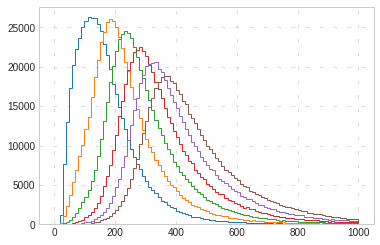

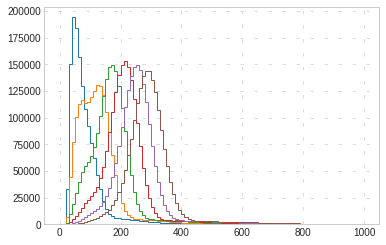

In [6]:
for l in range(7000,17001,2000):
  plt.hist(df.query('is_high==1 & lyield==%i' % l)['crvinfo__PEs'], bins=100, range=(0, 1000), histtype='step');
plt.figure()
for l in range(7000,17001,2000):
  plt.hist(df.query('is_high==0 & lyield==%i' % l)['crvinfo__PEs'], bins=100, range=(0, 1000), histtype='step');

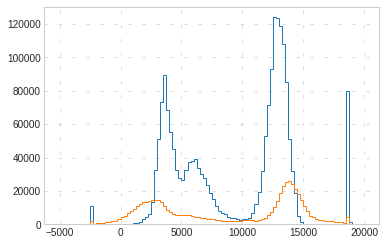

In [7]:
plt.hist(df.query('is_high==0 & lyield==%i' % 17000)['_z'], bins=100, range=(-5000, 20000), histtype='step');
plt.hist(df.query('is_high==1 & lyield==%i' % 17000)['_z'], bins=100, range=(-5000, 20000), histtype='step');

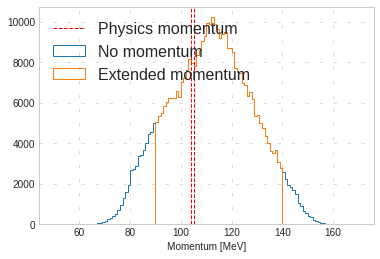

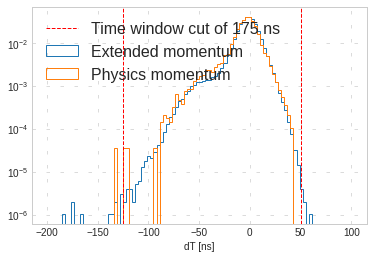

In [8]:
label = r'$\frac{P_{ext}}{P_{phy}} = %.1f$' % mom_scale
_, bins, _ = plt.hist(df.query(cut_nomom)['deent_mom'], bins=120, range=[50, 170], histtype='step', label='No momentum');
plt.hist(df.query(cut_extmom)['deent_mom'], bins=bins, histtype='step', label='Extended momentum');
plt.axvline(PMIN_PHY, color='r', linestyle='--', linewidth=1)
plt.axvline(PMAX_PHY, color='r', linestyle='--', label='Physics momentum', linewidth=1)
plt.legend(loc='upper left', prop={'size': 16})
plt.xlabel('Momentum [MeV]')

plt.figure()
plt.hist(df.query(cut_extmom)['crvinfo__dT'], bins=100, range=(-200, 100), histtype='step', density=True, label='Extended momentum');
plt.hist(df.query(cut_phymom)['crvinfo__dT'], bins=100, range=(-200, 100), histtype='step', density=True, label='Physics momentum');
plt.axvline(TMIN, color='r', linestyle='--', linewidth=1)
plt.axvline(TMAX, color='r', linestyle='--', linewidth=1, label='Time window cut of 175 ns')
plt.yscale('log')
plt.xlabel('dT [ns]');
plt.legend(loc='upper left', prop={'size': 16})

In [9]:
util = Utils()
util.pritnLiveTimes()

LIVETIME_MU2E: 3.460000e+06
LIVETIME_HI: 5.490000e+06
LIVETIME_LO: 1.869000e+08


#Background estimation: production sources

In [22]:
def plot_background(cut_query, title, altitude_scale, log_scale=True, make_plot=True):

  lyield_scale=0.001726
  bg_ave = []
  pe_ave = []
  bg_err = []
  print(title)

  for ly in range(7000,17001,2000):
    bg = util.getNormBackground(df, cut_query+" & lyield =="+str(ly), mom_scale)
    bg_ave.append(bg[0]*altitude_scale)
    pe_ave.append(ly*lyield_scale)
    bg_err.append(bg[1]*math.sqrt(altitude_scale))
    print("PE: %.1f, bg: %3.4f, err: %3.4f" % (ly*lyield_scale, bg[0]*altitude_scale, bg[1]))

  plt.errorbar(pe_ave, bg_ave, yerr=bg_err, fmt='.k');
  plt.title(title)
  if log_scale:
    plt.yscale('log')
  return (bg_ave, pe_ave, bg_err)

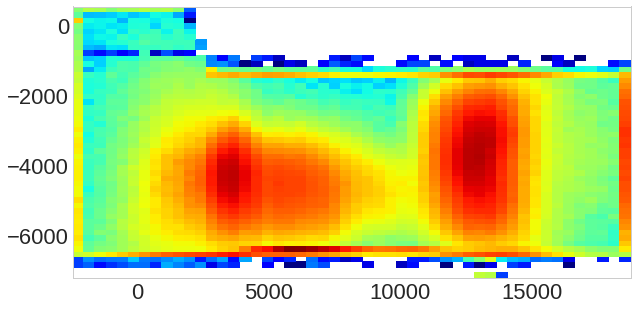

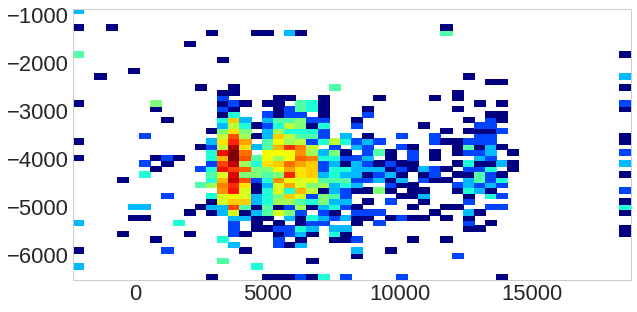

In [23]:
plt.hist2d(df.query('_z>-20000')['_z'], df.query('_z>-20000')['_x'], bins=(50, 50), norm=mpl.colors.LogNorm(), cmap=plt.cm.jet)
plt.figure()
plt.hist2d(df.query('_z>-20000 & pred<0.001')['_z'], df.query('_z>-20000 & pred<0.001')['_x'], bins=(50, 50), norm=mpl.colors.LogNorm(), cmap=plt.cm.jet);

In [24]:
utilcry3 = Utils()
utilcry3.LIVETIME_LO=3.83E+08 
utilcry3.LIVETIME_HI=1.28E+07 
utilcry3.pritnLiveTimes()

LIVETIME_MU2E: 3.460000e+06
LIVETIME_HI: 1.280000e+07
LIVETIME_LO: 3.830000e+08


Correlation for crvinfo__z: -0.019, 0.103
Correlation for crvinfo__PEs: -0.021, -0.063
Correlation for crvinfo__dT: -0.021, -0.078
Correlation for de_nhits: -0.065, -0.054
Correlation for ue_nhits: -0.029, 0.005
Correlation for dequal_TrkPID: -0.064, -0.095
Correlation for dequal_TrkQual: -0.001, -0.129
Correlation for deent_td: -0.134, -0.165
Correlation for deent_z0: 0.036, 0.028
Correlation for deent_d0: -0.837, -0.843
Correlation for deent_om: -0.755, -0.883
Correlation for deent_d0_om: 0.120, 0.121


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

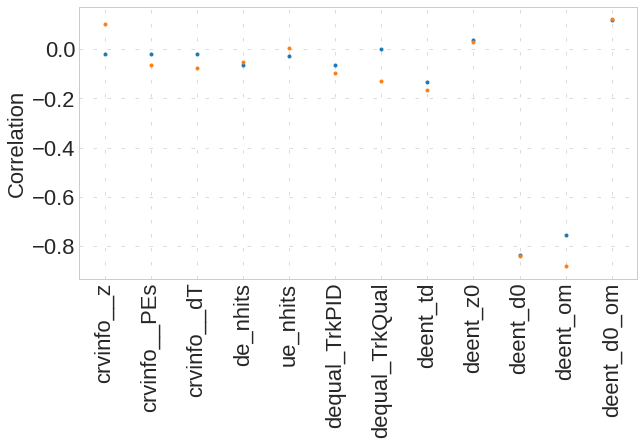

In [25]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr

dTZPE_noMom_variables_list = {
                  'crvinfo__z': [-5000, 20000],
                  'crvinfo__PEs': [-1, 1000],
                  'crvinfo__dT': [-500, 500],
                  'de_nhits': [-2, 100],
                  'ue_nhits': [-2, 100],
                  'dequal_TrkPID': [-1.1, 1.1],
                  'dequal_TrkQual': [-0.1, 1.1],
                  'deent_td': [0, 10],
                  'deent_z0': [-500,500],
                  'deent_d0': [-500,500],
                  'deent_om': [-0.01, 0.05],
                  'deent_d0_om' : [300, 1200]
                  }

x = []
y_p = []
y_s = []

for var in dTZPE_noMom_variables_list.keys():
  corrp, _ = pearsonr(df.query('deent_mom<200')['deent_mom'], df.query('deent_mom<200')[var])
  corrs, _ = spearmanr(df.query('deent_mom<200')['deent_mom'], df.query('deent_mom<200')[var])
  print('Correlation for %s: %.3f, %.3f' % (var,corrp,corrs))
  x.append(var)
  y_p.append(corrp)
  y_s.append(corrs)

plt.plot(x, y_p, '.', label='pearson')
plt.plot(x, y_s, '.', label='spearman')
plt.ylabel('Correlation')
plt.xticks(rotation=90)

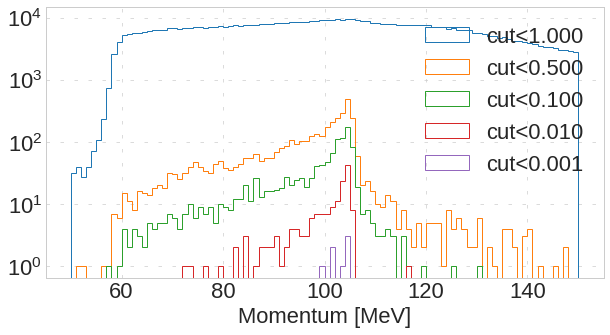

In [26]:
for cut in [1, 0.5, 0.1, 0.01, 0.001]:
  plt.hist(cry3df.query('pred<%f'%cut)['deent_mom'], range=(50, 150), histtype='step', bins=100, label=('cut<%.3f'%cut));
#  plt.hist(df.query('lyield==17000 & pred<%f'%cut)['deent_mom'], range=(100, 106), histtype='step', bins=10, label=('cut<%.3f'%cut), density=True);
plt.yscale('log')
plt.xlabel('Momentum [MeV]')
#plt.xlim(90, 120)
plt.legend()

CRY3 background: 9.03 +/- 1.53, hi: 8.65, lo: 0.38
CRY4 background: 16.49 +/- 2.76, hi: 11.97, lo: 4.52
CRY3 background: 6.51 +/- 1.30, hi: 6.22, lo: 0.29
CRY4 background: 13.58 +/- 2.53, hi: 10.08, lo: 3.50
CRY3 background: 4.24 +/- 1.05, hi: 4.05, lo: 0.19
CRY4 background: 10.56 +/- 2.28, hi: 8.19, lo: 2.37
CRY3 background: 0.57 +/- 0.38, hi: 0.54, lo: 0.03
CRY4 background: 1.65 +/- 0.90, hi: 1.26, lo: 0.39
CRY3 background: 0.01 +/- 0.01, hi: 0.00, lo: 0.01
CRY4 background: 1.50 +/- 0.89, hi: 1.26, lo: 0.24
CRY3 background: 0.01 +/- 0.01, hi: 0.00, lo: 0.01
CRY4 background: 1.46 +/- 0.89, hi: 1.26, lo: 0.20
CRY3 background: 0.01 +/- 0.01, hi: 0.00, lo: 0.01
CRY4 background: 1.45 +/- 0.89, hi: 1.26, lo: 0.19
CRY3 background: 0.01 +/- 0.01, hi: 0.00, lo: 0.01
CRY4 background: 1.43 +/- 0.89, hi: 1.26, lo: 0.17
CRY3 background: 0.01 +/- 0.01, hi: 0.00, lo: 0.01
CRY4 background: 0.78 +/- 0.63, hi: 0.63, lo: 0.15


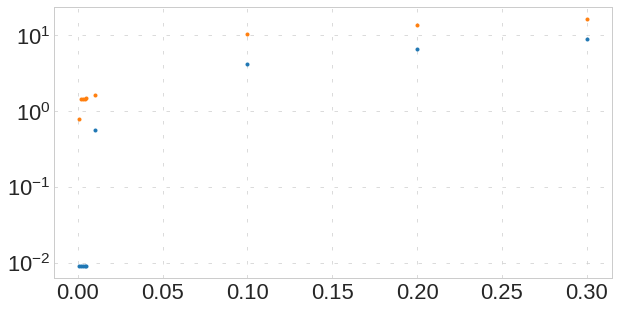

In [27]:
x = []
y_cry3 = []
y_cry4 = []

for cut in [0.3, 0.2, 0.1, 0.01, 0.005, 0.004, 0.003, 0.002, 0.001]:
  bg = utilcry3.getNormBackground(cry3df, cut_phymom+('& pred<%f'%cut), mom_scale)
  print('CRY3 background: %.2f +/- %.2f, hi: %.2f, lo: %.2f' % (bg[0], bg[1], bg[2], bg[3]))
  y_cry3.append(bg[0])

  bg = util.getNormBackground(df.query("lyield ==15000"), cut_phymom+('& pred<%f'%cut), mom_scale)
  print('CRY4 background: %.2f +/- %.2f, hi: %.2f, lo: %.2f' % (bg[0], bg[1], bg[2], bg[3]))
  y_cry4.append(bg[0])
  x.append(cut)

plt.plot(x, y_cry3, '.')
plt.plot(x, y_cry4, '.')
plt.yscale('log')
  

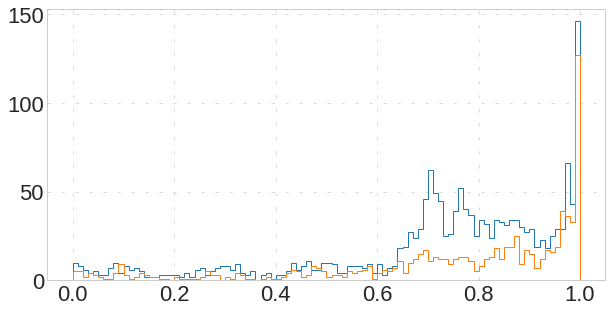

In [28]:
plt.hist(df.query(cut_phymom+" & lyield ==17000")['pred'], histtype='step', bins=100);
plt.hist(cry3df.query(cut_phymom)['pred'], histtype='step', bins=100);

Total Cosmic baclground
PE: 12.1, bg: 15.7551, err: 2.2145
PE: 15.5, bg: 3.7930, err: 1.1061
PE: 19.0, bg: 1.1283, err: 0.6367
PE: 22.4, bg: 0.7978, err: 0.6321
PE: 25.9, bg: 0.8367, err: 0.6327
PE: 29.3, bg: 0.7395, err: 0.6313


(0.001, 20)

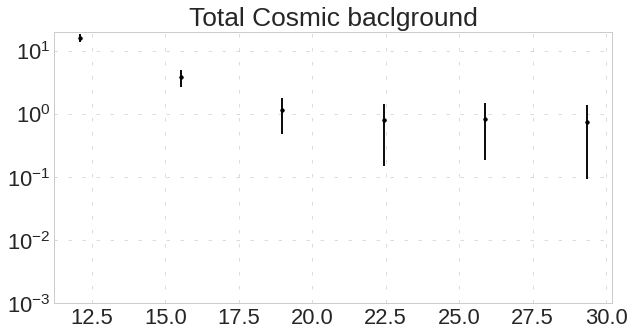

In [29]:
title='Total Cosmic baclground'
bg_ave, pe_ave, bg_err = plot_background(cut_current, title, 1.05, False, False)
plt.errorbar(pe_ave, bg_ave, yerr=bg_err, fmt='.k', label=title)
plt.yscale('log');
plt.ylim(0.001, 20)

Muons inside CRV
PE: 12.1, bg: 15.6191, err: 2.2140
PE: 15.5, bg: 3.7152, err: 1.1055
PE: 19.0, bg: 1.0700, err: 0.6359
PE: 22.4, bg: 0.7201, err: 0.6311
PE: 25.9, bg: 0.7395, err: 0.6313
PE: 29.3, bg: 0.6617, err: 0.6302
Non-muons
PE: 12.1, bg: 0.1111, err: 0.0414
PE: 15.5, bg: 0.0889, err: 0.0370
PE: 19.0, bg: 0.0666, err: 0.0321
PE: 22.4, bg: 0.0889, err: 0.0370
PE: 25.9, bg: 0.0889, err: 0.0370
PE: 29.3, bg: 0.0889, err: 0.0370
Muons outside CRV
PE: 12.1, bg: 0.0389, err: 0.0262
PE: 15.5, bg: 0.0000, err: 0.0000
PE: 19.0, bg: 0.0000, err: 0.0000
PE: 22.4, bg: 0.0000, err: 0.0000
PE: 25.9, bg: 0.0194, err: 0.0185
PE: 29.3, bg: 0.0000, err: 0.0000


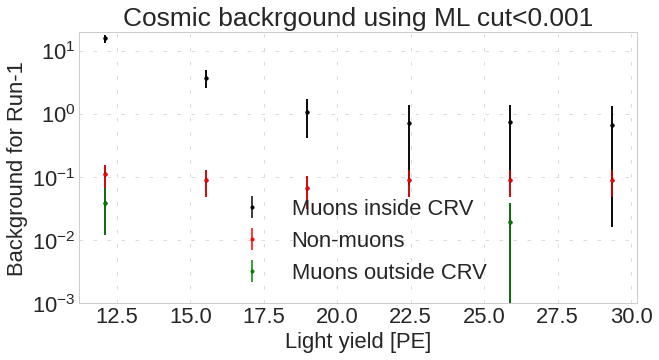

In [30]:
title='Muons inside CRV'
bg_ave, pe_ave, bg_err = plot_background(cut_current+" & _crvSectorType > 0 & abs(demcgen_pdg) == 13", title, 1.05, False, False)
plt.errorbar(pe_ave, bg_ave, yerr=bg_err, fmt='.k', label=title)

title = 'Non-muons'
bg_ave, pe_ave, bg_err = plot_background(cut_current+" & abs(demcgen_pdg) != 13", title, 1.2, False, False)
plt.errorbar(pe_ave, bg_ave, yerr=bg_err, fmt='.r', label=title)

title = 'Muons outside CRV'
bg_ave, pe_ave, bg_err = plot_background(cut_current+" & _crvSectorType < 0 & abs(demcgen_pdg) == 13", title, 1.05, False, False)
plt.errorbar(pe_ave, bg_ave, yerr=bg_err, fmt='.g', label=title)
plt.legend()
plt.yscale('log');
plt.ylim(0.001, 20)
#plt.title('Cosmic backrgound using CRV dT cut');
plt.title('Cosmic backrgound using ML cut<0.001');
plt.xlabel('Light yield [PE]')
plt.ylabel('Background for Run-1');

#Background estimation: CRV regions

Background from muons inside the fiducial CRV region
PE: 12.1, bg: 15.6191, err: 2.2140
PE: 15.5, bg: 3.7152, err: 1.1055
PE: 19.0, bg: 1.0700, err: 0.6359
PE: 22.4, bg: 0.7201, err: 0.6311
PE: 25.9, bg: 0.7395, err: 0.6313
PE: 29.3, bg: 0.6617, err: 0.6302
Background from muons outside of fiducial CRV region
PE: 12.1, bg: 0.0389, err: 0.0262
PE: 15.5, bg: 0.0000, err: 0.0000
PE: 19.0, bg: 0.0000, err: 0.0000
PE: 22.4, bg: 0.0000, err: 0.0000
PE: 25.9, bg: 0.0194, err: 0.0185
PE: 29.3, bg: 0.0000, err: 0.0000
Background from non-muons
PE: 12.1, bg: 0.1111, err: 0.0414
PE: 15.5, bg: 0.0889, err: 0.0370
PE: 19.0, bg: 0.0666, err: 0.0321
PE: 22.4, bg: 0.0889, err: 0.0370
PE: 25.9, bg: 0.0889, err: 0.0370
PE: 29.3, bg: 0.0889, err: 0.0370


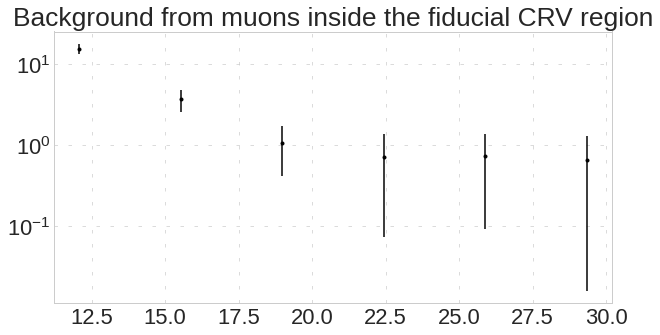

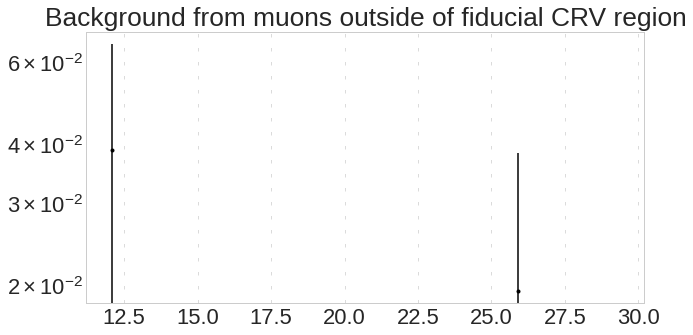

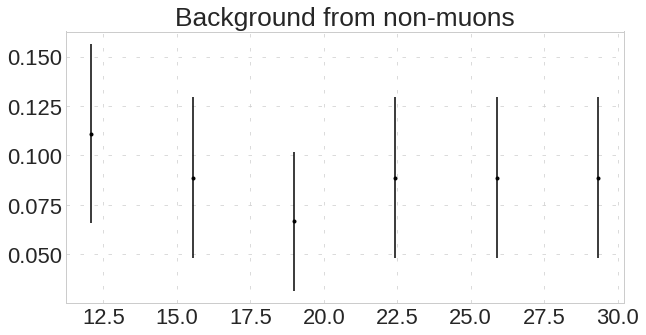

In [31]:
title='Background from muons inside the fiducial CRV region'
plot_background(cut_current+" & _crvSectorType > 0 & abs(demcgen_pdg) == 13", title, 1.05)

plt.figure()
title = 'Background from muons outside of fiducial CRV region'
plot_background(cut_current+" & _crvSectorType < 0 & abs(demcgen_pdg) == 13", title, 1.05)

plt.figure()
title = 'Background from non-muons'
plot_background(cut_current+" & abs(demcgen_pdg) != 13", title, 1.2, False);

Background from sector R
PE: 12.1, bg: 0.0194, err: 0.0185
PE: 15.5, bg: 0.0194, err: 0.0185
PE: 19.0, bg: 0.0000, err: 0.0000
PE: 22.4, bg: 0.0000, err: 0.0000
PE: 25.9, bg: 0.0000, err: 0.0000
PE: 29.3, bg: 0.0000, err: 0.0000
Background from sector L
PE: 12.1, bg: 0.0194, err: 0.0185
PE: 15.5, bg: 0.0000, err: 0.0000
PE: 19.0, bg: 0.0000, err: 0.0000
PE: 22.4, bg: 0.0000, err: 0.0000
PE: 25.9, bg: 0.0000, err: 0.0000
PE: 29.3, bg: 0.0000, err: 0.0000
Background from sector T
PE: 12.1, bg: 15.5802, err: 2.2138
PE: 15.5, bg: 3.6958, err: 1.1053
PE: 19.0, bg: 1.0505, err: 0.6357
PE: 22.4, bg: 0.7006, err: 0.6308
PE: 25.9, bg: 0.7201, err: 0.6311
PE: 29.3, bg: 0.6617, err: 0.6302
Background from sector E
PE: 12.1, bg: 0.0000, err: 0.0000
PE: 15.5, bg: 0.0000, err: 0.0000
PE: 19.0, bg: 0.0000, err: 0.0000
PE: 22.4, bg: 0.0000, err: 0.0000
PE: 25.9, bg: 0.0000, err: 0.0000
PE: 29.3, bg: 0.0000, err: 0.0000
Background from sector U


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: Data has no positive values, and therefore cannot be log-scaled.


PE: 12.1, bg: 0.0000, err: 0.0000
PE: 15.5, bg: 0.0000, err: 0.0000
PE: 19.0, bg: 0.0000, err: 0.0000
PE: 22.4, bg: 0.0000, err: 0.0000
PE: 25.9, bg: 0.0000, err: 0.0000
PE: 29.3, bg: 0.0000, err: 0.0000
Background from sector D
PE: 12.1, bg: 0.0000, err: 0.0000
PE: 15.5, bg: 0.0000, err: 0.0000
PE: 19.0, bg: 0.0194, err: 0.0185
PE: 22.4, bg: 0.0194, err: 0.0185
PE: 25.9, bg: 0.0194, err: 0.0185
PE: 29.3, bg: 0.0000, err: 0.0000


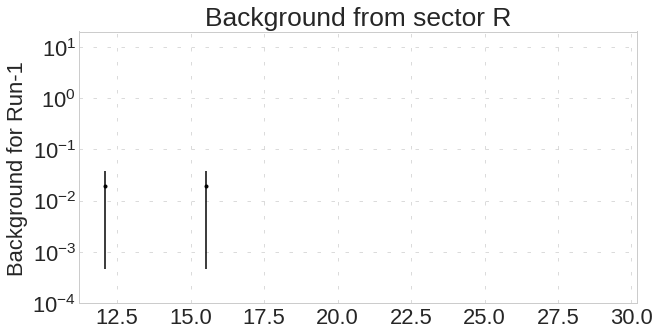

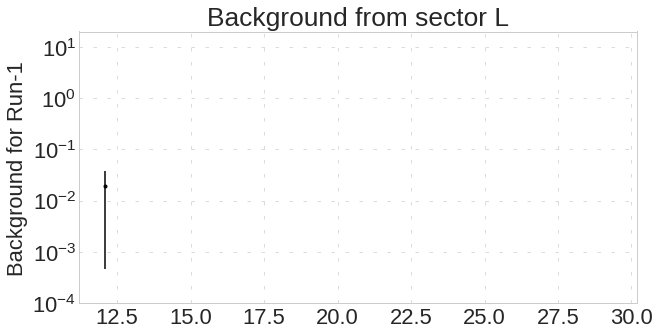

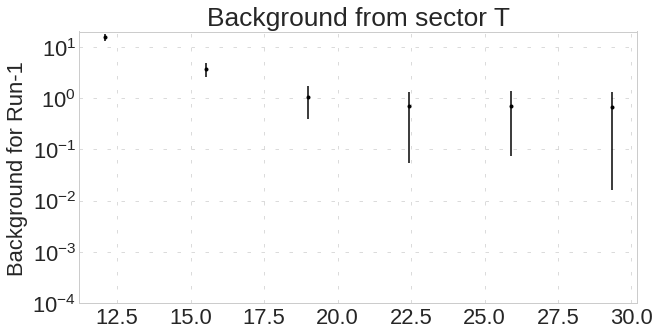

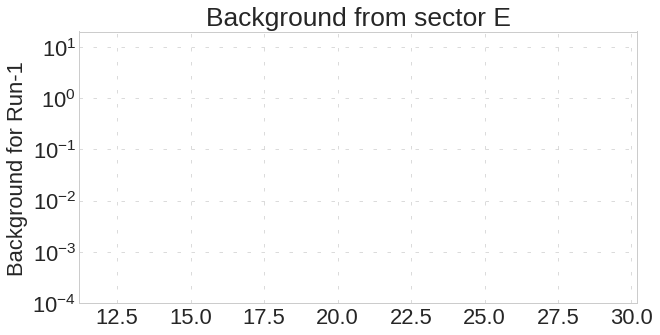

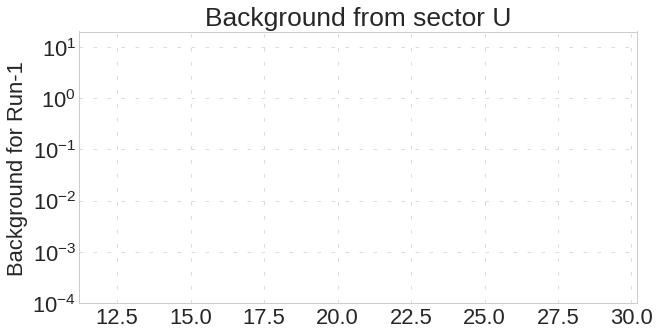

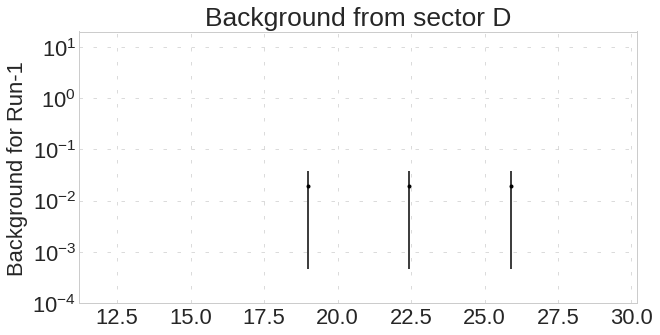

In [32]:
crvSectorLabel = ['R', 'L', 'T', 'E', 'U', 'D']
for crvSectorType in range(1,7):
  plt.figure()
  title='Background from sector %s' % crvSectorLabel[crvSectorType-1]
  cut_ = cut_current+(" & _crvSectorType ==%d  & abs(demcgen_pdg) == 13" % crvSectorType)
  plot_background(cut_, title, 1.05)
  plt.ylim(0.0001, 20)
  plt.ylabel('Background for Run-1')